<a href="https://colab.research.google.com/github/Bahaakhalled/House_Prices/blob/main/House_Prices_Kaggle_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [700]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import set_config
set_config(display='diagram')

In [701]:
!wget 'https://raw.githubusercontent.com/Bahaakhalled/House_Prices/main/train.csv'
!wget 'https://raw.githubusercontent.com/Bahaakhalled/House_Prices/main/test.csv'

--2022-09-01 15:50:22--  https://raw.githubusercontent.com/Bahaakhalled/House_Prices/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘train.csv.19’

train.csv.19        100%[===================>] 449.88K  --.-KB/s    in 0.02s   

2022-09-01 15:50:22 (18.1 MB/s) - ‘train.csv.19’ saved [460676/460676]

--2022-09-01 15:50:23--  https://raw.githubusercontent.com/Bahaakhalled/House_Prices/main/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451405 (441K) [text/plain]
Saving 

In [702]:
test_house=pd.read_csv('test.csv')
house=pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [703]:
house=house.drop('Id',axis=1)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [704]:
house.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [705]:
missing=(house.isnull().sum().sum()/np.product(house.shape) ) * 100
print('Data Missing: ',missing,'%')

Data Missing:  5.9631849315068495 %


In [706]:
miss_cols=house.columns[house.isnull().sum()>0]
miss_cols=house[miss_cols]

In [707]:
miss_cols={'Features': miss_cols.isnull().sum().index,'Missing%':miss_cols.isnull().sum()}
miss_cols=pd.DataFrame(data=miss_cols).reset_index().drop('index',axis=1)
miss_cols['Missing%']=miss_cols['Missing%'].apply(lambda m:(m/house.shape[0])*100)
miss_cols=miss_cols.sort_values(by='Missing%',ascending=False)
miss_cols

,Features,Missing%
16,PoolQC,99.520548
18,MiscFeature,96.301370
1,Alley,93.767123
17,Fence,80.753425
10,FireplaceQu,47.260274
0,LotFrontage,17.739726
11,GarageType,5.547945
12,GarageYrBlt,5.547945
13,GarageFinish,5.547945
14,GarageQual,5.547945


In [708]:
len(house.columns[house.isnull().sum()>0])

19

In [709]:
copy_house=house.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f863c852cd0>,
      dtype=object)

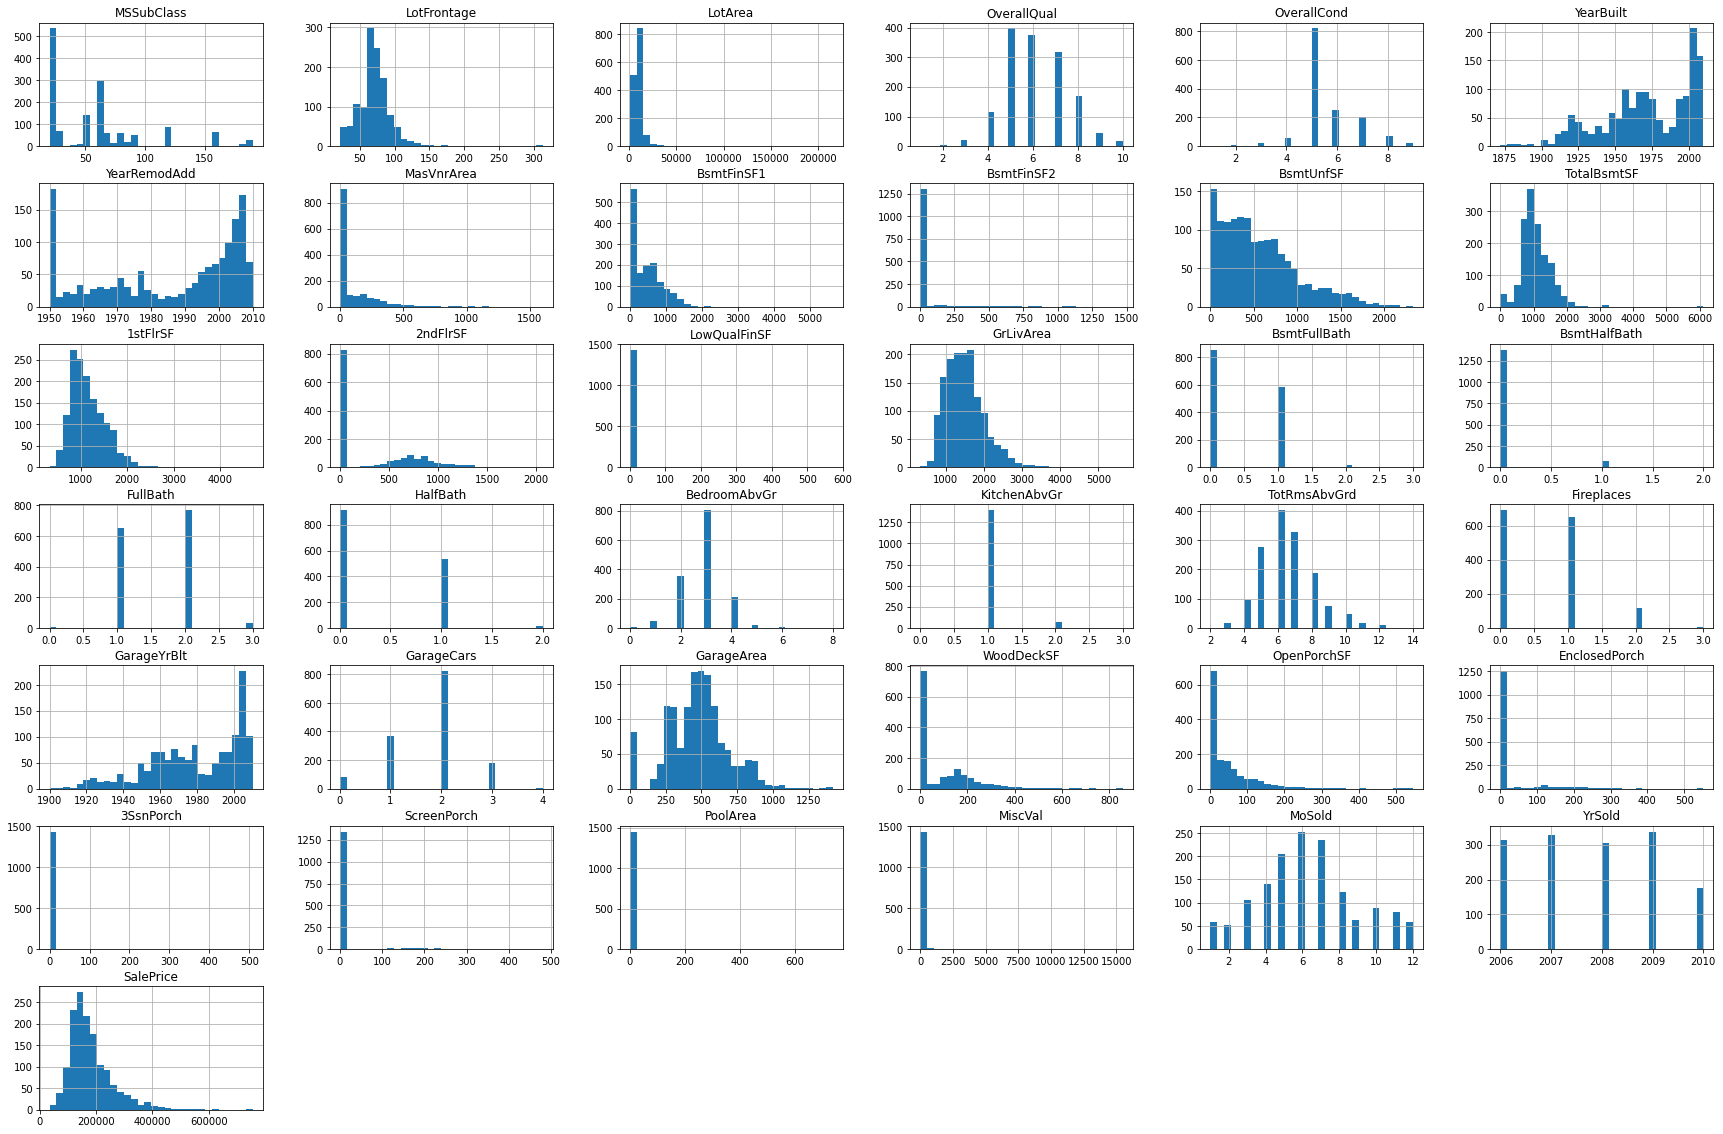

In [710]:
copy_house.hist(bins=30, figsize=(30, 20))

In [711]:
#cols=[LotFrontage,GarageYrBlt,'WoodDeckSF',OpenPorchSF,EnclosedPorch,'ScreenPorch',SalePrice,LotArea,'BasementFinSF1']
#3SsnPorch,PoolArea,Miscval check
#Lot Frontage Right skewed
#YearBuilt Left Skewed
#BsmtFinSF1 Right skewed
##MasVnrArea Right skewed
#TotalBsmtSF Right skewed
#SalePrice MOst Imp

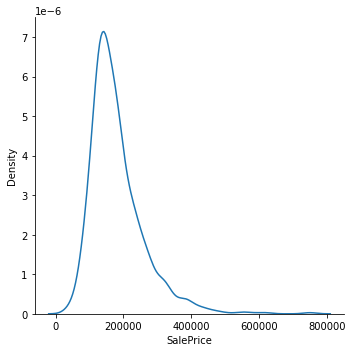

In [712]:
sns.displot(copy_house['SalePrice'], kind='kde')

In [713]:
copy_house['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [714]:
q = copy_house['SalePrice'].quantile(.95)
copy_house = copy_house[copy_house['SalePrice'] < q]

In [715]:
copy_house['SalePrice'].describe()

count      1387.000000
mean     168807.803172
std       57446.595410
min       34900.000000
25%      128700.000000
50%      159000.000000
75%      201000.000000
max      326000.000000
Name: SalePrice, dtype: float64

In [716]:
house.shape[0]-copy_house.shape[0]

73

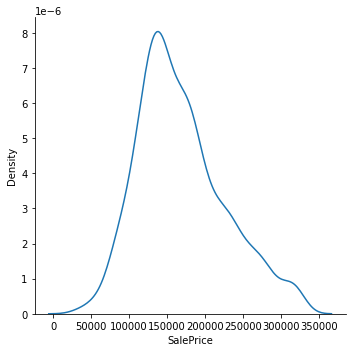

In [717]:
sns.displot(copy_house['SalePrice'], kind='kde')

In [718]:
df=pd.DataFrame(copy_house.select_dtypes(exclude='object').corr())
df=df.drop(df.loc[:,df.columns != 'SalePrice'].columns,axis=1)
df.sort_values(by='SalePrice',ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.781060
GrLivArea,0.653331
GarageCars,0.625293
GarageArea,0.602064
FullBath,0.575695
YearBuilt,0.564631
TotalBsmtSF,0.543207
YearRemodAdd,0.541536
1stFlrSF,0.524518


One hot Encoding 
and Simple imputer
Simple Imputer comes first with data cleaning and as soon as we have a full no missing val dataset we'll work on encoding the dataset and maybe later try feature engineering

Imputing

In [719]:
copy_house.duplicated().sum()

0

In [720]:
high_miss_cols=miss_cols.loc[miss_cols['Missing%']>25]
low_miss_cols=miss_cols.loc[miss_cols['Missing%']<25]

print('# of Columns with over 25 percent of missing values: ',len(high_miss_cols.Features))
print('# of Columns with under 25 percent of missing values: ',len(low_miss_cols.Features))

copy_house=copy_house.drop(high_miss_cols.Features,axis=1)

# of Columns with over 25 percent of missing values:  5
# of Columns with under 25 percent of missing values:  14


In [721]:
def imp(X):
  cat_low=X.select_dtypes(include='object').columns
  num_low=X.select_dtypes(exclude='object').columns

  num_imp=SimpleImputer(missing_values=np.nan,strategy='mean')
  num=num_imp.fit_transform(X[num_low])
  num_imp=pd.DataFrame(num,columns=num_low)

  cat_imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
  cat=cat_imp.fit_transform(X[cat_low])
  cat_imp=pd.DataFrame(cat,columns=cat_low)


  frames=[num_imp,cat_imp]
  return pd.concat(frames, axis=1, join="inner")

In [722]:
def OHE(X):
  return pd.get_dummies(X,drop_first=True)

In [723]:
def scale(X):
  scaler = StandardScaler()
  vals = scaler.fit_transform(X)
  return pd.DataFrame(vals,columns=X.columns)

In [724]:
def log(X):
  temp=X.select_dtypes(include='float').columns
  for j in temp:
    X[temp] = X[temp].astype(int)
  temp=X.select_dtypes(exclude='object').columns
  for j in temp:
    X[j]=np.log2(X[j])
    return X

In [725]:
def Train(model):
  X=copy_house.drop(['SalePrice','OverallQual'],axis=1)
  y=copy_house['SalePrice'].copy()
  X=X.pipe(imp).pipe(log).pipe(OHE)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
  X_train_new=X_train.pipe(scale)
  X_test_new=X_test.pipe(scale)

  model.fit(X_train_new,y_train)
  preds=model.predict(X_test_new)
  print('MSE for ' + str(model),mean_squared_error(y_test, preds))
  print('MAE for ' + str(model),mean_absolute_error(y_test, preds))
  print('R2 for ' + str(model),r2_score(y_test, preds))
  return model, X_train, X_test, y_train, y_test

In [726]:
#from sklearn.preprocessing import PolynomialFeature
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
Train(LinearRegression())
print()
Train(DecisionTreeRegressor())
print()
ft_imp, X_train, X_test, y_train, y_test=Train(RandomForestRegressor(random_state=1))
#Train(PolynomialFeatures(2))

MSE for LinearRegression() 3.706261009260862e+31
MAE for LinearRegression() 2274750815936499.0
R2 for LinearRegression() -1.2001326842482608e+22

MSE for DecisionTreeRegressor() 961046013.1654676
MAE for DecisionTreeRegressor() 21904.98561151079
R2 for DecisionTreeRegressor() 0.6888015364853161

MSE for RandomForestRegressor(random_state=1) 319256620.3748234
MAE for RandomForestRegressor(random_state=1) 13366.678237410071
R2 for RandomForestRegressor(random_state=1) 0.8966207982068494


After Removing 73 rows of data to fix y column skewness the result reached a high 0.89

Model Performed better when i removed the OverallQual column which was highly correlated

In [727]:
best_clf=Gridsrch(RandomForestRegressor(random_state=1),X_train, X_test, y_train, y_test) 

RandomForestRegressor(random_state=1) before Optimization: 0.8984423315615306
RandomForestRegressor(random_state=1) after Optimization: 0.8993097748414566
{'n_estimators': 300}


In [728]:
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV

def Gridsrch(clf,X_train, X_test, y_train, y_test):
  parameters={'n_estimators':[300]}
  scorer=make_scorer(r2_score)
  grid_layout=GridSearchCV(clf,parameters,scoring=scorer)
  grid_fit=grid_layout.fit(X_train,y_train)

  best_clf=grid_fit.best_estimator_

  #predict using plane and optimized model
  predictions=(clf.fit(X_train,y_train).predict(X_test))
  best_predictions=best_clf.predict(X_test)
  print(str(clf) +" before Optimization: " + str(r2_score(y_test,predictions)))
  print(str(clf) +" after Optimization: " + str(r2_score(y_test,best_predictions)))
  print(grid_fit.best_params_)
  return best_clf

In [729]:
print("Predictions:",best_clf.predict(X_test[:5]))
print()
print("Real Results:",y_test[:5])

Predictions: [153631.57333333 186170.23333333 176487.59        96218.64333333
 138301.85      ]

Real Results: 1276    162000
742     179000
909     174000
520     106250
63      140000
Name: SalePrice, dtype: int64


Text(0.5, 0, 'Random Forest Feature Importance')

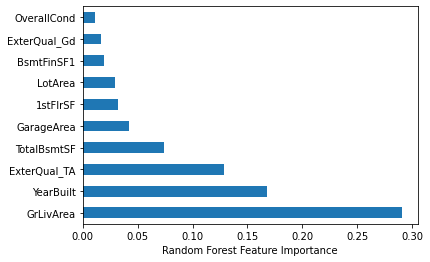

In [730]:
cp_X=X.copy()
cp_X=cp_X.pipe(imp).pipe(log).pipe(OHE).pipe(scale)
feat_importances = pd.Series(ft_imp.feature_importances_, index=cp_X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel("Random Forest Feature Importance")

In [731]:
#numeric_features = num_low
#numeric_transformer = Pipeline(steps=[('Imputing w Mean',SimpleImputer(missing_values=np.nan,strategy='mean')),('Numerical Scaling',MinMaxScaler())])

#categorical_features = cat_low
#categorical_transformer =  Pipeline(steps=[('Imputing w Most Freq',SimpleImputer(missing_values=np.nan,strategy='most_frequent'))])

#preprocessor = ColumnTransformer(transformers=[('Numerical Transformation', numeric_transformer, numeric_features),('Categorical Transformation', categorical_transformer, categorical_features)], remainder='passthrough')
#clf=Pipeline(steps=[('preprocessor',preprocessor)])
#,('Linear Model',LinearRegression()
#lr=LinearRegression()
#clf.fit_transform(X_train,y_train)
#X_fit=pd.DataFrame(clf.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
#X_fit.isnull().sum()
#X_fit

In [739]:
X=copy_house.drop(['SalePrice','OverallQual'],axis=1)
X.columns.difference(test_house.columns).tolist()

[]

In [740]:
test_house=test_house.drop(high_miss_cols.Features,axis=1)
test_tran=test_house.drop(['Id','OverallQual'],axis=1)
test_tran=test_tran.pipe(imp).pipe(log).pipe(OHE).pipe(scale)

In [734]:
best_clf=RandomForestRegressor(n_estimators=300,random_state=1)
X=copy_house.drop(['SalePrice','OverallQual'],axis=1)
y=copy_house['SalePrice'].copy()
cp_X=X.copy()
cp_X=cp_X.pipe(imp).pipe(log).pipe(OHE).pipe(scale)
best_clf.fit(cp_X,y)

RandomForestRegressor(n_estimators=300, random_state=1)

In [741]:
test_tran.columns.difference(cp_X.columns).tolist()

[]

In [744]:
test_tran[cp_X.columns.difference(test_tran.columns).tolist()]=0

In [745]:
preds_test=best_clf.predict(test_tran)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [749]:
extra_results=pd.DataFrame(preds_test, columns = ['SalePrice'])
extra_results["id"] = extra_results.index+1
extra_results = extra_results[['id','SalePrice']]
extra_results.to_csv("submission.csv", index=False)